# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
df['Price'] = df['Price'].str.replace(',','').astype(int) #allows me to run describe in the next line by remvoing commas from 4+ digit nums and casting all as ints

In [4]:
df['Price'].describe() #checks summary of stats to determine next steps

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [5]:
df['Price'].isnull().sum() #check for null vals

np.int64(0)

No missing values

In [6]:
df = df[df['Price'] < 1000] #drop extreme outliers

In [7]:
df['Price'].describe() #describe again to see if its looking better

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

Part 2

In [8]:
df2 = pd.read_csv('./data/mn_police_use_of_force.csv')
df2.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [9]:
#grabbing sums to get an idea of proportions
NaNs = df2['subject_injury'].isnull().sum()
Yes = df2['subject_injury'].eq('Yes').sum()
No = df2['subject_injury'].eq('No').sum()
print('NaN:', NaNs, 'Yes:', Yes, 'No:', No)

NaN: 9848 Yes: 1631 No: 1446


In [10]:
print('Proportion Missing: ', (NaNs)/(NaNs+Yes+No))

Proportion Missing:  0.7619342359767892


In [11]:
df2_nans = df2[df2['subject_injury'].isnull()]
#df2_nans.head()
df2_nans['force_type'].value_counts(normalize=True)

force_type
Bodily Force                   0.715983
Chemical Irritant              0.144293
Taser                          0.100020
Maximal Restraint Technique    0.017262
Less Lethal                    0.008834
Improvised Weapon              0.007514
Police K9 Bite                 0.003148
Gun Point Display              0.002742
Baton                          0.000203
Name: proportion, dtype: float64

In [12]:
df2_nonans = df2[df2['subject_injury'].isnull() == False]
df2_nonans['force_type'].value_counts(normalize=True)

force_type
Bodily Force              0.773156
Taser                     0.104647
Chemical Irritant         0.055899
Gun Point Display         0.025024
Improvised Weapon         0.024049
Police K9 Bite            0.014950
Less Lethal Projectile    0.000975
Baton                     0.000650
Firearm                   0.000650
Name: proportion, dtype: float64

The biggest difference in force type proportions between when subject injury is reported and when it is not is the use of chemical irritants. When the injury is NaN, 14.4% of the time a chemical irritant is used. When the injury is not NaN, 5.6% of the time a chemcial irritant is used. 

Part 3

In [13]:
df3 = pd.read_csv('./data/pretrial_data.csv')
df3.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [14]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df4 = pd.read_csv(url,low_memory=False)

In [15]:
df4.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [16]:
df4['WhetherDefendantWasReleasedPretrial'] = df4['WhetherDefendantWasReleasedPretrial'].replace(' ', np.nan)
df4['WhetherDefendantWasReleasedPretrial'].unique()
df4['WhetherDefendantWasReleasedPretrial'] = df4['WhetherDefendantWasReleasedPretrial'].replace('9', '1') #should be binary, 0 or 1

In [17]:
#get some sense of what these variables look like
print(df4['ImposedSentenceAllChargeInContactEvent'].head(15))
print(df4['SentenceTypeAllChargesAtConvictionInContactEvent'].head(13))


0                     
1                   60
2                   12
3     .985626283367556
4                     
5                   12
6                   36
7                    6
8                   24
9                   12
10    5.91375770020534
11                    
12                    
13                 120
14                  24
Name: ImposedSentenceAllChargeInContactEvent, dtype: object
0     9
1     0
2     1
3     1
4     4
5     0
6     1
7     0
8     1
9     1
10    0
11    4
12    4
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64


This shows that the missing values in the first column go along with 4 and 9 in the second column

In [18]:
df4_check = df4[df4['SentenceTypeAllChargesAtConvictionInContactEvent'] > 3]
df4_check['ImposedSentenceAllChargeInContactEvent'].unique()
#checks to see if reasoning about missing values going with 4+ is correct

array([' '], dtype=object)

In [19]:
df4_check['SentenceTypeAllChargesAtConvictionInContactEvent'].describe()
prop4 = (df4_check['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4).sum() / len(df4_check)
print(prop4)

0.9697337899038992


97% of the missing values are 4s so other values are outliers and I will replace all missings in the original dataframe with 4

In [20]:
df4['ImposedSentenceAllChargeInContactEvent'] = df4['ImposedSentenceAllChargeInContactEvent'].replace(' ', '4')
df4['ImposedSentenceAllChargeInContactEvent'] = df4['ImposedSentenceAllChargeInContactEvent'].astype(float).round(2)
#casts entries as floats and rounds them for consistency


In [21]:
df4['ImposedSentenceAllChargeInContactEvent'].head(10)

0     4.00
1    60.00
2    12.00
3     0.99
4     4.00
5    12.00
6    36.00
7     6.00
8    24.00
9    12.00
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

part 1

In [87]:
df_shark = pd.read_excel('./data/GSAF5.xls')
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Unknown,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,...,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


part 2

In [91]:
df_shark = df_shark.dropna(axis=1, how='all')
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-02-07 00:00:00,2025.0,Unprovoked,Turks and Caicos,NaN,Thompson Cove Beach,Swimming,Unknown,F,55,...,Unknown,Todd Smith: Platform X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,2025.0,Unprovoked,Australia,Queensland,"Woorim Beach, Bribie Island,",Swimming,Charlize Zmuda,F,17,...,Bull shark,9 News: The Brisbane Times: The Guardian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


part 3

In [92]:
df_shark = df_shark[df_shark['Year'] > 1939]
df_shark['Year'].describe()

count    5460.000000
mean     1991.949267
std        24.087612
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2026.000000
Name: Year, dtype: float64

In [93]:
#max is 2026 which is the future so remove those as well
df_shark = df_shark[df_shark['Year'] < 2026]

#check for nulls
print(df_shark['Year'].isnull().sum())

df_shark['Year'].describe()

0


count    5459.000000
mean     1991.943030
std        24.085408
min      1940.000000
25%      1969.000000
50%      2000.000000
75%      2013.000000
max      2025.000000
Name: Year, dtype: float64

In [44]:
import matplotlib.pyplot as plt

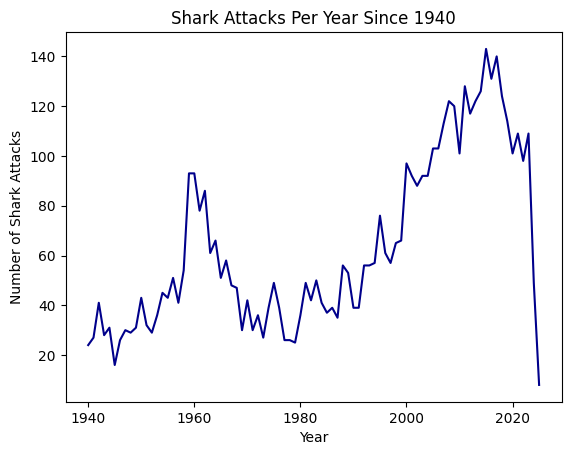

In [94]:
year_tots = df_shark['Year'].value_counts().sort_index()
plt.plot(year_tots.index, year_tots.values, color = 'darkblue')  
plt.xlabel('Year')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks Per Year Since 1940')
plt.show()

This graph shows a brief spike in the 60's and then bottoming out in the late 70's and a steady increase since then.

part 4

In [95]:
df_shark['Age'] = df_shark['Age'].replace({',': ''}, regex=True)
df_shark['Age'].unique() #get sense of issues with data that are easy to fix

array([55, 17, 12, 37, 23, 40, 28, 69, 48, '60+', '?', 57, 24, 45, 61, 27,
       38, 16, 33, 30, 15, 41, 14, 26, 'Middle age', 18, 21, 49, 25, 46,
       19, 20, 65, 64, '13', nan, '11', '46', '32', '29', '10', '64',
       '62', '39', '22', '15', '16', '21', '66', '52', '20', '44', '26',
       '47', '55', '30', '59', '8', '50', '45', '34', '38', '30s', '37',
       '9', '19', '20/30', '35', '65', '20s', '77', '60', '49', '42',
       '!2', '24', '73', '25', '18', '50s', '58', '67', '17', '14', '6',
       '41', '53', '68', '43', '40', '51', '31', 39, 58, 51, 10, 13, 60,
       '40s', 68, 35, 62, 'teen', 8, 22, 32, 56, 'Teen', 42, 36, 50, 'M',
       9, 11, 34, '!6', 31, '!!', 47, 7, 71, 59, 53, 54, 75, '45 and 15',
       73, 52, 29, 70, 4, 63, 44, '28 & 22', '22 57 31', '60s', "20's",
       43, 67, 74, '9 & 60', 'a minor', 6, 3, 82, 66, 72, '23', '12',
       '36', '63', '71', '48', '70', '18 months', '57', '7', '28', '33',
       '61', '74', '27', '3', '56', '28 & 26', '5', '54',

In [96]:
df_shark['Age'] = df_shark['Age'].str.replace(r'[a-zA-Z]', '', regex=True)
df_shark['Age'] = df_shark['Age'].str.replace("'", "", regex=True)
df_shark['Age'] = df_shark['Age'].str.replace("-", "", regex=True)
df_shark['Age'] = df_shark['Age'].str.replace(r"\?", "", regex=True)
df_shark['Age'] = df_shark['Age'].str.replace(" ", "", regex=True)
df_shark['Age'] = df_shark['Age'].str.replace("&", "", regex=True)
df_shark['Age'] = df_shark['Age'].str.replace("!", "", regex=True)
#run a bunch of replace functions to get any funky symbols out
df_shark['Age'] = pd.to_numeric(df_shark['Age'], errors='coerce')
df_shark.loc[df_shark['Age'] > 100, 'Age'] = np.nan
df_shark['Age'].unique()


array([  nan, 13.  , 11.  , 46.  , 32.  , 29.  , 10.  , 64.  , 62.  ,
       39.  , 22.  , 15.  , 16.  , 21.  , 66.  , 52.  , 20.  , 44.  ,
       26.  , 47.  , 55.  , 30.  , 59.  ,  8.  , 50.  , 45.  , 34.  ,
       38.  , 37.  ,  9.  , 19.  , 35.  , 65.  , 77.  , 60.  , 49.  ,
       42.  ,  2.  , 24.  , 73.  , 25.  , 18.  , 58.  , 67.  , 17.  ,
       14.  ,  6.  , 41.  , 53.  , 68.  , 43.  , 40.  , 51.  , 31.  ,
       23.  , 12.  , 36.  , 63.  , 71.  , 48.  , 70.  , 57.  ,  7.  ,
       28.  , 33.  , 61.  , 74.  , 27.  ,  3.  , 56.  ,  5.  , 54.  ,
       86.  , 69.  , 87.  ,  0.33,  4.  , 81.  , 78.  ])

In [97]:
df_shark['Age'].describe()

count    1732.000000
mean       28.693609
std        14.758236
min         0.330000
25%        17.000000
50%        25.000000
75%        38.000000
max        87.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Shark Attacks by Age')

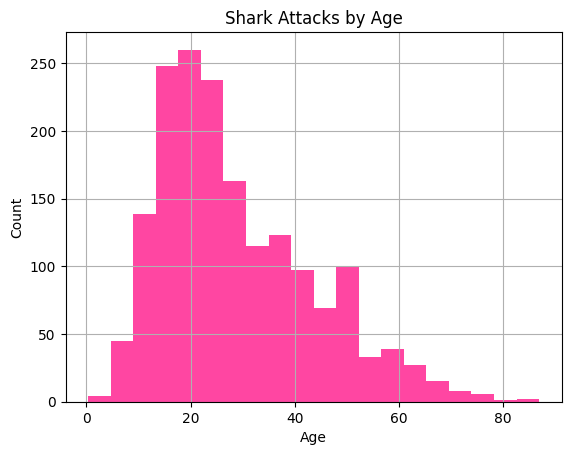

In [98]:
df_shark['Age'].hist(bins = 20, color = '#FF46A2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Shark Attacks by Age')

part 5

In [108]:
df_shark['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [107]:
df_shark['Sex'].unique()
df_shark['Sex'] = df_shark['Sex'].replace(' ', '', regex=True)
df_shark['Sex'] = df_shark['Sex'].replace('2', '', regex=True)
df_shark['Sex'] = df_shark['Sex'].replace('x', '', regex=True)
df_shark['Sex'] = df_shark['Sex'].replace('lli', 'F', regex=True)
males = sum(df_shark['Sex'] == 'M')
prop_male = (males)/(len(df_shark))
print('Proportion of victims who are male:', prop_male)

Proportion of victims who are male: 0.7875068693899981


Part 6

In [100]:
df_shark['Type'].unique()

array(['Unprovoked', 'Provoked', ' Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation', 'Boat'],
      dtype=object)

In [101]:
df_shark['Type'] = df_shark['Type'].str.replace(' ', '', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Questionable', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace(r'\?', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Unconfirmed', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Watercraft', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('SeaDisaster', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Unverified', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Invalid', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Underinvestigation', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].str.replace('Boat', 'Unknown', regex=True)
df_shark['Type'] = df_shark['Type'].fillna("Unknown")
#replaces everything other than Provoked/Unprovoked with unknown
df_shark['Type'].unique()

array(['Unprovoked', 'Provoked', 'Unknown'], dtype=object)

In [102]:
prop_unprovoked = sum(df_shark['Type'] == 'Unprovoked')/len(df_shark)
print(prop_unprovoked)

0.7429932222018685


74.3% of attacks are classified as unprovoked.

Part 7

In [64]:
df_shark['Fatal Y/N'].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [88]:
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].str.strip().str.upper()
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].replace({'Y X 2': 'Y'})
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].replace({'NQ': 'UNKNOWN'})
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].replace({'F': 'UNKNOWN', 'M': 'UNKNOWN'})
df_shark['Fatal Y/N'] = df_shark['Fatal Y/N'].fillna("UNKNOWN")
# Strips strings and puts them to all upper case then replaces all weird values with unknown

In [89]:
df_shark['Fatal Y/N'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

Part 8

In [109]:
df_shark.groupby(['Sex', 'Type']).describe()

Year                                                   \
                 count         mean        std     min      25%     50%   
Sex Type                                                                  
F   Provoked      28.0  2004.607143  20.150065  1960.0  1995.75  2011.0   
    Unknown       78.0  1998.141026  21.646945  1940.0  1984.00  2006.0   
    Unprovoked   602.0  2003.365449  19.189119  1940.0  1996.00  2009.0   
M   Provoked     446.0  1986.439462  25.440208  1940.0  1961.25  1988.0   
    Unknown      540.0  1986.600000  26.426557  1941.0  1962.00  1992.0   
    Unprovoked  3313.0  1992.996076  23.341206  1940.0  1973.00  2000.0   

                                    Age             ...               \
                    75%     max   count       mean  ...    75%   max   
Sex Type                                            ...                
F   Provoked    2018.25  2023.0    10.0  29.800000  ...  38.50  44.0   
    Unknown     2015.00  2023.0    26.0  28.320385  ...  39.25  77.0   
    Unprovoked  2017.00  2025.0   247.0  27.481781  ...  38.00  73.0   
M   Provoked    2010.00  2025.0   142.0  32.464789  ...  43.00  77.0   
    Unknown     2011.00  2023.0   164.0  32.579268  ...  44.00  74.0   
    Unprovoked  2013.00  2025.0  1126.0  27.995560  ...  35.00  87.0   

               original order                                             \
                        count         mean          std     min      25%   
Sex Type                                                                   
F   Provoked             26.0  5058.884615  1469.753839  2292.0  3968.00   
    Unknown              77.0  4634.025974  1460.337947  1531.0  3437.00   
    Unprovoked          556.0  4875.825540  1359.803010  1535.0  3927.75   
M   Provoked            432.0  3858.831019  1572.291144  1551.0  2433.50   
    Unknown             527.0  3888.326376  1590.242268  1562.0  2467.00   
    Unprovoked         3200.0  4220.965625  1489.285300  1537.0  2993.50   

                                         
                   50%      75%     max  
Sex Type                                 
F   Provoked    5306.0  6337.00  6752.0  
    Unknown     4819.0  5926.00  6735.0  
    Unprovoked  5017.0  6042.00  6802.0  
M   Provoked    3475.0  5239.75  6786.0  
    Unknown     3673.0  5304.00  6750.0  
    Unprovoked  4216.5  5496.25  6799.0  

[6 rows x 24 columns]

In [110]:
men_provoked = 446/(446+3313)
women_provoked = 28/(28+602)
#numbers from above chart
print("Proportion of attacks on men that were provoked:", men_provoked, ", Proportion of attacks on women that were provoked:", women_provoked)

Proportion of attacks on men that were provoked: 0.11864857674913541 , Proportion of attacks on women that were provoked: 0.044444444444444446


A much higher proportion of attacks on women were unprovoked as compared to on men.

In [111]:
df_shark.groupby(['Type', 'Fatal Y/N']).describe()

Year                                                  \
                       count         mean        std     min     25%     50%   
Type       Fatal Y/N                                                           
Provoked   N           496.0  1986.306452  25.350689  1940.0  1962.0  1987.0   
           UNKNOWN       9.0  1991.555556  25.025543  1962.0  1967.0  2007.0   
           Y            13.0  1983.076923  28.883275  1952.0  1956.0  1965.0   
Unknown    N           366.0  1987.568306  27.144151  1940.0  1961.0  1993.5   
           UNKNOWN     399.0  1986.972431  23.361088  1940.0  1964.5  1989.0   
           Y           120.0  1967.616667  23.607855  1941.0  1944.0  1963.0   
Unprovoked N          3324.0  1996.683514  21.732659  1940.0  1983.0  2003.0   
           UNKNOWN      52.0  1992.384615  22.663051  1943.0  1972.5  1994.5   
           Y           680.0  1982.586765  25.630744  1940.0  1959.0  1982.0   

                                         Age             ...               \
                         75%     max   count       mean  ...    75%   max   
Type       Fatal Y/N                                     ...                
Provoked   N          2010.0  2025.0   148.0  32.094595  ...  43.00  77.0   
           UNKNOWN    2012.0  2019.0     2.0  39.000000  ...  48.00  57.0   
           Y          2009.0  2023.0     4.0  28.250000  ...  35.25  39.0   
Unknown    N          2014.0  2023.0    46.0  34.782609  ...  42.50  70.0   
           UNKNOWN    2008.0  2023.0   132.0  30.214621  ...  43.00  77.0   
           Y          1984.0  2023.0    14.0  41.000000  ...  58.00  74.0   
Unprovoked N          2014.0  2025.0  1187.0  27.535805  ...  35.00  87.0   
           UNKNOWN    2016.5  2024.0     9.0  31.666667  ...  44.00  73.0   
           Y          2006.0  2025.0   190.0  29.600000  ...  38.00  78.0   

                     original order                                    \
                              count         mean          std     min   
Type       Fatal Y/N                                                    
Provoked   N                  481.0  3853.991684  1574.069859  1551.0   
           UNKNOWN              9.0  4327.444444  1594.953848  2521.0   
           Y                   12.0  3549.083333  1731.081294  1909.0   
Unknown    N                  355.0  3968.160563  1677.493321  1536.0   
           UNKNOWN            397.0  3888.667506  1422.336666  1531.0   
           Y                  118.0  2759.694915  1195.971983  1562.0   
Unprovoked N                 3196.0  4450.582603  1435.300080  1534.0   
           UNKNOWN             46.0  3961.739130  1433.067672  1623.0   
           Y                  654.0  3555.896024  1503.745739  1535.0   

                                                        
                          25%     50%      75%     max  
Type       Fatal Y/N                                    
Provoked   N          2450.00  3457.0  5242.00  6786.0  
           UNKNOWN    2808.00  4916.0  5542.00  6509.0  
           Y          2074.75  2569.0  4889.25  6663.0  
Unknown    N          2379.50  3815.0  5534.00  6788.0  
           UNKNOWN    2656.00  3666.0  5088.00  6750.0  
           Y          1677.50  2524.5  3386.75  6516.0  
Unprovoked N          3330.75  4517.5  5681.25  6800.0  
           UNKNOWN    2925.25  3668.5  4074.50  6718.0  
           Y          2194.25  3236.0  4626.00  6802.0  

[9 rows x 24 columns]

In [112]:
provoked_fatal = 13/(13+496)
unprovoked_fatal = 680/(680+3324)
print("Proportion of provoked attacks that were fatal:", provoked_fatal, ", Proportion of unprovoked attacks that were fatal:", unprovoked_fatal)

Proportion of provoked attacks that were fatal: 0.025540275049115914 , Proportion of unprovoked attacks that were fatal: 0.16983016983016982


Unprovoked attacks resulted in a fatality at a much higher rate than provoked attacks.

In [113]:
 df_shark.groupby(['Sex', 'Fatal Y/N']).describe()

Year                                                  \
                count         mean        std     min     25%     50%   
Sex Fatal Y/N                                                           
F   N           561.0  2005.743316  16.637578  1944.0  2000.0  2010.0   
    UNKNOWN      59.0  1996.322034  23.062464  1940.0  1983.5  2005.0   
    Y            88.0  1988.693182  26.176395  1940.0  1964.5  1992.0   
M   N          3328.0  1994.036058  23.151074  1940.0  1975.0  2002.0   
    UNKNOWN     322.0  1988.521739  22.912154  1941.0  1966.0  1992.0   
    Y           649.0  1980.055470  26.048507  1940.0  1957.0  1976.0   

                                   Age             ...               \
                   75%     max   count       mean  ...    75%   max   
Sex Fatal Y/N                                      ...                
F   N          2017.00  2025.0   229.0  26.951965  ...  38.00  70.0   
    UNKNOWN    2014.50  2023.0    22.0  27.196818  ...  35.50  77.0   
    Y          2014.25  2025.0    32.0  32.875000  ...  44.25  70.0   
M   N          2013.00  2025.0  1142.0  28.614711  ...  37.00  87.0   
    UNKNOWN    2008.75  2024.0   118.0  30.864407  ...  43.00  67.0   
    Y          2004.00  2025.0   172.0  29.976744  ...  38.00  78.0   

              original order                                             \
                       count         mean          std     min      25%   
Sex Fatal Y/N                                                             
F   N                  520.0  5046.869231  1247.060503  1666.0  4199.75   
    UNKNOWN             58.0  4505.155172  1497.477303  1531.0  3413.75   
    Y                   81.0  3872.086420  1612.253742  1535.0  2550.00   
M   N                 3217.0  4301.129935  1490.875118  1537.0  3049.00   
    UNKNOWN            315.0  3930.653968  1386.604140  1573.0  2759.00   
    Y                  627.0  3426.414673  1501.282942  1538.0  2093.50   

                                       
                  50%     75%     max  
Sex Fatal Y/N                          
F   N          5221.0  6141.5  6800.0  
    UNKNOWN    4718.0  5740.0  6735.0  
    Y          3628.0  5206.0  6802.0  
M   N          4369.0  5592.0  6799.0  
    UNKNOWN    3714.0  5057.5  6750.0  
    Y          3051.0  4457.0  6780.0  

[6 rows x 24 columns]

In [114]:
female_fatal = 88/(88+561)
male_fatal = 649/(649+3328)
print("Proportion of female attacks that were fatal:", female_fatal, ", Proportion of male attacks that were fatal", male_fatal)

Proportion of female attacks that were fatal: 0.13559322033898305 , Proportion of male attacks that were fatal 0.16318833291425697


Attacks are more likely to be fatal when the victim is male.

I like sharks!

Part 9

In [119]:
df_shark['Species '] =df_shark['Species '].str.strip().str.lower() #resets formatting to make column easier to sift through
white_sharks = df_shark['Species '].str.contains(r'\bwhite\b|\bgreat white\b', na=False).sum() #grabs any with white or great white and takes sum
prop_white_sharks = white_sharks/len(df_shark)
print("The proportion of recorded attacks that were by white sharks is :", prop_white_sharks)

The proportion of recorded attacks that were by white sharks is : 0.12181718263418208


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

Data on race in the US Census is via self identification. This means it could be susceptible to lying, however, there would be little incentive to lie on the census.

2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

Knowing census data, from ratios to overall numbers, is critical to policy creation. In a representaive government specifically, it is of the utmost importance that representative understand the population they are representing and protecting. Funding is the most important aspect of this as representative need to know how many people reside in a place to get a sense of the type of funding the area needs. For this reason data quality is also critical, as the census becomes counterproductive if the information recorded in it is inaccurate. 

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

The census gathers responses from everyone, rather than just a representative sample which is an excellent way to minimize error. The 2020 census being the first that is able to be filled out online is optimal for ease and accessability, however, it does become more susceptible to inaccuracies (such as typos) that could diminish the quality of the data. Additionally, the scope of the questions is limited which prevents comprehensive range of demographics. Having more questions becomes logistically difficult but could be beneficial for reflecting on diversity. The accessability of the census is its most important aspect, as it leads to a robust dataset highly representative of the target sample. 

4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

The census gave the options male and female, limiting those who do not identify with either to this binary. This is an antiquated practice and results in data that is not representative of the true sample.

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

These characteristics can be extremely complex from person to person and they can not be easily limited to a selection of options. This could make it difficult to get a general sense of the data to be able to apply it in a useful way. Missing values also become very difficult to deal with because of this because making predictions on any of these characteristics is near-impossible. Creating some sort of 'Unknown' value to replace missings in these cases could be useful as making assumptions would be useless and deleting the entire entry would erase data that is relevant beyond just this missing entry. 

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have? 

This algorithm would have to make many assumptions and would be highly likely to result in bias against certain groups. These characteristics are highly personal and complex and should not be reduced to a prediction from an algorithm. 